In [30]:
# librerias
import h5py as h5
from pyhdf.SD import SD, SDC
import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from numpy import meshgrid
from scipy.interpolate import griddata as gd
import os
%matplotlib inline

In [2]:
file_name = '../data/MYD09CMA.A2018015.006.2018017024441.hdf'

In [6]:
file = SD(file_name, SDC.READ)

In [7]:
print(file.info())

(17, 6)


In [8]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print (idx,sds)

0 Coarse Resolution Surface Reflectance Band 8
1 Coarse Resolution Surface Reflectance Band 9
2 Coarse Resolution Surface Reflectance Band 10
3 Coarse Resolution Surface Reflectance Band 11
4 Coarse Resolution Surface Reflectance Band 12
5 Coarse Resolution TOA Reflectance Band 1
6 Coarse Resolution TOA Reflectance Band 3
7 Coarse Resolution TOA Reflectance Band 8
8 Coarse Resolution TOA Reflectance Band 9
9 Coarse Resolution TOA Reflectance Band 10
10 Coarse Resolution AOT Model Residual Values
11 Coarse Resolution AOT at 550 nm
12 Coarse Resolution Atmospheric Optical Depth Model
13 Coarse Resolution Water Vapor
14 Coarse Resolution Air Temperature (2m)
15 Coarse Resolution Atmospheric Optical Depth QA
16 Coarse Resolution Number Mapping AOT


In [69]:
sds_obj = file.select('Coarse Resolution Air Temperature (2m)') # select sds

data = sds_obj.get() # get sds data
print (data)

[[    0     0     0 ...,     0     0     0]
 [    0     0     0 ...,     0     0     0]
 [    0     0     0 ...,     0     0     0]
 ..., 
 [    0 24669 24669 ..., 24335 24335 24679]
 [    0 24812 24812 ..., 24703 24703 24703]
 [    0 24691 24691 ..., 24724 24724 24724]]


In [70]:
import pprint
pprint.pprint(sds_obj.attributes())

{'_FillValue': 0,
 'add_offset': 0.0,
 'add_offset_err': 0.0,
 'calibrated_nt': 5,
 'long_name': 'Coarse Resolution Air Temperature (2m)',
 'scale_factor': 100.0,
 'scale_factor_err': 0.0,
 'units': 'degrees K',
 'valid_range': [0, 40000]}


In [71]:
for key, value in sds_obj.attributes().items():
    print (key, value)
    if key == 'add_offset':
        add_offset = value  
    if key == 'scale_factor':
        scale_factor = value

_FillValue 0
valid_range [0, 40000]
scale_factor 100.0
scale_factor_err 0.0
add_offset 0.0
add_offset_err 0.0
calibrated_nt 5
units degrees K
long_name Coarse Resolution Air Temperature (2m)


In [72]:
data = (data - add_offset) * scale_factor
print (data)

[[       0.        0.        0. ...,        0.        0.        0.]
 [       0.        0.        0. ...,        0.        0.        0.]
 [       0.        0.        0. ...,        0.        0.        0.]
 ..., 
 [       0.  2466900.  2466900. ...,  2433500.  2433500.  2467900.]
 [       0.  2481200.  2481200. ...,  2470300.  2470300.  2470300.]
 [       0.  2469100.  2469100. ...,  2472400.  2472400.  2472400.]]


In [73]:
data.shape

(3600, 7200)

In [74]:
DATAFIELD_NAME = 'Coarse Resolution Air Temperature (2m)'

In [75]:
x = np.linspace(-180,180, data.shape[1])

In [76]:
y = np.linspace(-90,90, data.shape[0])

In [77]:
x.shape

(7200,)

In [78]:
y.shape

(3600,)

In [79]:
# constantes
LONG_MIN = -115.65
LONG_MAX = -107.94
LAT_MIN = 25.41
LAT_MAX = 33.06

In [80]:
m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

In [81]:
lons, lats = m(x,y)

In [82]:
lons.shape

(7200,)

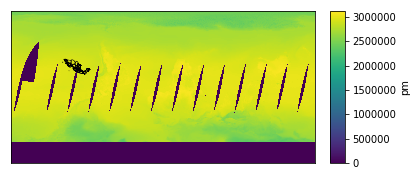

In [83]:
# work
"""
m.drawcoastlines(linewidth=0.5)
m.pcolormesh(lons, lats, data)
"""
clevs = np.linspace(data.min(), data.max(), 20)

cs = m.pcolormesh(lons, lats, data, latlon=True)

cbar = m.colorbar(cs, location='right', pad="5%")
cbar.set_label('pm')

m.readshapefile('../shapes/Estados', 'Estados')

plt.savefig("test.png", dpi=300)


In [88]:
data[1000,1000]

2872300.0

127